# Import

In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
from random import randint
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.keras import datasets, layers, models

# Extract train data

In [2]:
# An empty list. We will insert the data into this list in (img_path, label) format
features = []
targets = []

# Get the list of all the images
images = glob.glob("data/train/all/*")
random.shuffle(images)

image_size = 205

# Add the datas on lists. target : 0 for normal case, 1 for pneumonia case
for img in images:
    curImg = (Image.open(img).resize((image_size, image_size)))
    curImg = np.array(np.expand_dims(curImg, axis=-1))
    features.append(curImg)
    if "virus" in img:
        target = [1]
    elif "bacteria" in img:
        target = [1]
    else:
        target = [0]
    targets.append(target)

features = np.array(features)
targets = np.array(targets)

print("Shape train_data", features.shape)
print("Shape targets", targets.shape)

Shape train_data (2398, 205, 205, 1)
Shape targets (2398, 1)


# View Images

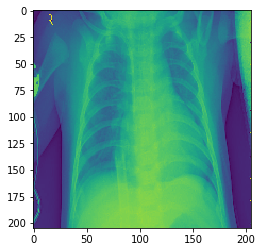

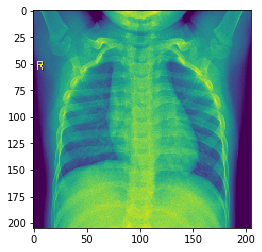

In [3]:
for a in [randint(0, len(targets)) for _ in range(2)]:
    plt.imshow(np.squeeze(features[a]))
    plt.show()

# Create train data

In [4]:
# Take 10% of the train dataset for the validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.1, random_state=42)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (2158, 205, 205, 1)
X_valid.shape (240, 205, 205, 1)
y_train.shape (2158, 1)
y_valid.shape (240, 1)


# Create the model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 203, 203, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 101, 101, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0         
____

# Train the model

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, 
                    validation_data=(X_valid, y_valid))


Train on 2158 samples, validate on 240 samples
Epoch 1/3
2158/2158 [==============================] - 99s 46ms/sample - loss: 15.7675 - acc: 0.7317 - val_loss: 0.5197 - val_acc: 0.8417
Epoch 2/3
2158/2158 [==============================] - 95s 44ms/sample - loss: 0.3285 - acc: 0.8860 - val_loss: 0.1673 - val_acc: 0.9583
Epoch 3/3
2158/2158 [==============================] - 95s 44ms/sample - loss: 0.1999 - acc: 0.9342 - val_loss: 0.1967 - val_acc: 0.9167


# Extract test data

In [7]:
# An empty list. We will insert the data into this list in (img_path, label) format
features_test = []
targets_test = []

# Get the list of all the images
images_test = glob.glob("data/test/all/*")
random.shuffle(images)

# Add the datas on lists. target : 0 for normal case, 1 for pneumonia case
for img in images_test:
    curImg = (Image.open(img).resize((image_size, image_size)))
    curImg = np.array(np.expand_dims(curImg, axis=-1))
    features_test.append(curImg)
    if "virus" in img:
        target = [1]
    elif "bacteria" in img:
        target = [1]
    else:
        target = [0]
    targets_test.append(target)

features_test = np.array(features_test)
targets_test = np.array(targets_test)

print("Shape features_test", features_test.shape)
print("Shape targets_test", targets_test.shape)

Shape features_test (458, 205, 205, 1)
Shape targets_test (458, 1)


# Evaluate the model with test data

In [8]:
#plt.plot(history.history['acc'], label='accuracy')
#plt.plot(history.history['val_acc'], label = 'val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(features_test,  targets_test, verbose=2)
print('Accuracy : ', test_acc)

458/458 - 8s - loss: 0.5337 - acc: 0.8472
Accuracy :  0.8471616


# Make a prediction

In [9]:
pred = model.predict(features_test[0:1])
predicted_label =pred.argmax(axis=-1)
print("Predicted label : ", predicted_label)
print("True label : ", targets_test[0:1])

Predicted label :  [1]
True label :  [[1]]


# Save the model

In [10]:
#model.save('model_save/pneumodia_model')
model.save_weights('model_save_tf2/pneumodia_checkpoint')